## **Практическое задание**

**1. Добиться хорошего результата от модели, собранной на занятии (5 угаданныx картинок из 8 предложенных). Варианты изменений:**
- изменение слоёв и их количества;
- изменение метода оптимизации;
- изменение процесса обучения;
- *преобразование данных transform

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch import optim
import torch.nn.functional as F
from torch import nn
import torchvision
import torchvision.transforms as transforms

In [ ]:
train_dataset = torchvision.datasets.CIFAR10(root='data/',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=True)


image, label = train_dataset[0]
print(image.size())
print(label)

Files already downloaded and verified
torch.Size([3, 32, 32])
6


In [ ]:
image.permute(1, 2, 0).shape

torch.Size([32, 32, 3])

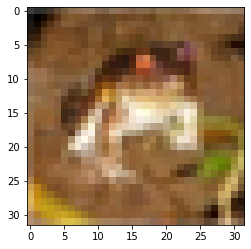

In [ ]:
plt.imshow(image.permute(1, 2, 0).numpy());

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

In [ ]:
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                            download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8,
                                          shuffle=False)

Files already downloaded and verified


In [ ]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        # self.fc1 = nn.Linear(input_dim, 4 * hidden_dim)
        # self.fc2 = nn.Linear(4 * hidden_dim, 2 * hidden_dim)
        # self.fc3 = nn.Linear(2 * hidden_dim, hidden_dim)
        # self.fc4 = nn.Linear(hidden_dim, output_dim)


        self.fc1 = nn.Linear(input_dim, 4 * hidden_dim)
        self.fc2 = nn.Linear(4 * hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        # x = F.leaky_relu(x)
        # x = self.fc4(x)
        return x
    
    def predict(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        # x = F.leaky_relu(x)
        # x = self.fc4(x)
        x = F.softmax(x)
        return x

# print(torch.seed())
torch.manual_seed(2248622982603265490)
net = Net(3072, 100, 10)
net.train()

Net(
  (fc1): Linear(in_features=3072, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)

In [ ]:
net.fc1.weight[0][:5]

tensor([-0.0150, -0.0027,  0.0058,  0.0138,  0.0041], grad_fn=<SliceBackward0>)

In [ ]:
torch.initial_seed()

2248622982603265490

In [ ]:
# 3 * 32 * 32

In [ ]:
criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.0)
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [ ]:
num_epochs = 10

for epoch in range(num_epochs):
    running_loss = 0.0
    running_items = 0.0


    for i, data in enumerate(train_loader):
        inputs, labels = data[0], data[1]

         # Обнуляем градиент
        optimizer.zero_grad()
        # Делаем предсказание
        outputs = net(inputs)
        # Рассчитываем лосс-функцию
        loss = criterion(outputs, labels)
        # Делаем шаг назад по лоссу
        loss.backward()
        # Делаем шаг нашего оптимайзера
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        running_items += len(labels)
        if i % 700 == 0:    # печатаем каждые 300 mini-batches
            print(f'Epoch [{epoch + 1}/{num_epochs}]. ' \
                  f'Step [{i + 1}/{len(train_loader)}]. ' \
                  f'Loss: {running_loss / running_items:.3f}')
            running_loss, running_items = 0.0, 0.0

print('Training is finished!')

Epoch [1/10]. Step [1/782]. Loss: 0.036
Epoch [1/10]. Step [701/782]. Loss: 0.029
Epoch [2/10]. Step [1/782]. Loss: 0.025
Epoch [2/10]. Step [701/782]. Loss: 0.026
Epoch [3/10]. Step [1/782]. Loss: 0.026
Epoch [3/10]. Step [701/782]. Loss: 0.025
Epoch [4/10]. Step [1/782]. Loss: 0.023
Epoch [4/10]. Step [701/782]. Loss: 0.024
Epoch [5/10]. Step [1/782]. Loss: 0.026
Epoch [5/10]. Step [701/782]. Loss: 0.023
Epoch [6/10]. Step [1/782]. Loss: 0.024
Epoch [6/10]. Step [701/782]. Loss: 0.023
Epoch [7/10]. Step [1/782]. Loss: 0.022
Epoch [7/10]. Step [701/782]. Loss: 0.022
Epoch [8/10]. Step [1/782]. Loss: 0.022
Epoch [8/10]. Step [701/782]. Loss: 0.022
Epoch [9/10]. Step [1/782]. Loss: 0.018
Epoch [9/10]. Step [701/782]. Loss: 0.021
Epoch [10/10]. Step [1/782]. Loss: 0.022
Epoch [10/10]. Step [701/782]. Loss: 0.021
Training is finished!


## Загрузка и сохранение модели

### Сохранение модели

In [ ]:
PATH_WEIGHTS = './cifar_net_test_version_weights.pth'
torch.save(net.state_dict(), PATH_WEIGHTS)

In [ ]:
print("Model state_dict: ")
for param in net.state_dict():
    print(param, "\t", net.state_dict()[param].size())

In [ ]:
PATH_MODEL = './cifar_net_test_version_model.pth'
torch.save(net, PATH_MODEL)

### Загрузка и использование модели 

In [ ]:
net = Net(3072, 100, 10)
net.load_state_dict(torch.load(PATH_WEIGHTS))
net

In [ ]:
net = torch.load(PATH_MODEL)

In [ ]:
data_iter = iter(test_loader)
images, labels = data_iter.next()

GroundTruth:  cat ship ship plane frog frog car frog


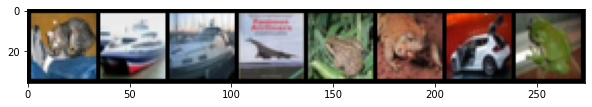

In [ ]:
net.eval()
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.figure(figsize=(10, 5))
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join(classes[labels[j]] for j in range(len(labels))))

In [ ]:
print(outputs)

tensor([[ 0.4559, -0.3885, -0.0078,  1.5599,  0.3160,  1.0811, -0.6189, -1.5659,
          0.0563, -1.6367],
        [ 2.8884,  2.5239, -1.0942, -1.6430, -1.2347, -2.8924, -2.8414, -1.6348,
          3.2662,  3.0711],
        [ 3.8937,  2.6454, -1.9071, -1.9042, -0.7186, -3.2154, -4.5807, -1.4689,
          4.5390,  2.1292],
        [ 2.2642, -0.2408,  0.8421, -1.2753,  1.2765, -1.7823, -2.3406, -0.6815,
          2.7585, -0.7980],
        [-1.2796, -3.5871,  1.7289,  0.4421,  3.3987,  0.1839,  2.5158, -2.3493,
         -2.5143, -4.2330],
        [-0.8722, -2.8364,  0.7357,  1.6195,  0.6000,  0.8709,  2.9108, -0.1014,
         -4.1876, -2.3969],
        [-0.6855,  3.3743,  0.2834,  2.2382, -4.8688,  2.4879, -1.1873, -1.2026,
         -3.4811,  0.1079],
        [-0.0543, -1.3258,  1.0785,  0.4813,  1.9659, -0.3497,  2.0542, -1.2220,
         -2.5515, -1.8977]], grad_fn=<AddmmBackward0>)


In [ ]:
net.predict(images)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


tensor([[1.1012e-01, 4.7334e-02, 6.9263e-02, 3.3217e-01, 9.5744e-02, 2.0577e-01,
         3.7591e-02, 1.4582e-02, 7.3849e-02, 1.3586e-02],
        [2.2641e-01, 1.5726e-01, 4.2196e-03, 2.4373e-03, 3.6664e-03, 6.9876e-04,
         7.3532e-04, 2.4574e-03, 3.3033e-01, 2.7179e-01],
        [2.9529e-01, 8.4743e-02, 8.9323e-04, 8.9586e-04, 2.9318e-03, 2.4142e-04,
         6.1641e-05, 1.3845e-03, 5.6299e-01, 5.0574e-02],
        [2.8649e-01, 2.3399e-02, 6.9101e-02, 8.3158e-03, 1.0670e-01, 5.0089e-03,
         2.8658e-03, 1.5059e-02, 4.6965e-01, 1.3403e-02],
        [5.4335e-03, 5.4066e-04, 1.1007e-01, 3.0395e-02, 5.8459e-01, 2.3479e-02,
         2.4177e-01, 1.8642e-03, 1.5806e-03, 2.8342e-04],
        [1.3395e-02, 1.8790e-03, 6.6875e-02, 1.6184e-01, 5.8389e-02, 7.6551e-02,
         5.8871e-01, 2.8955e-02, 4.8649e-04, 2.9160e-03],
        [9.2952e-03, 5.3875e-01, 2.4492e-02, 1.7299e-01, 1.4174e-04, 2.2204e-01,
         5.6278e-03, 5.5419e-03, 5.6772e-04, 2.0551e-02],
        [4.3167e-02, 1.2105

In [ ]:
_, predicted = torch.max(outputs, 1)

predicted

tensor([3, 8, 8, 8, 4, 6, 1, 6])

In [ ]:
print('Predicted: ', ' '.join(classes[predicted[j]] for j in range(len(labels))))

Predicted:  cat ship ship ship deer frog car frog


In [ ]:
gt = np.array([classes[labels[j]] for j in range(len(labels))])
pred = np.array([classes[predicted[j]] for j in range(len(labels))])

print(gt)
print(pred)
print(f'Accuracy is {(gt == pred).sum() / len(gt)}')

# начальное значение метрики
# ['cat' 'ship' 'ship' 'plane' 'frog' 'frog' 'car' 'frog']
# ['dog' 'ship' 'ship' 'ship' 'deer' 'frog' 'dog' 'deer']
# Accuracy is 0.375

['cat' 'ship' 'ship' 'plane' 'frog' 'frog' 'car' 'frog']
['cat' 'ship' 'ship' 'ship' 'deer' 'frog' 'car' 'frog']
Accuracy is 0.75


**Изменения от начальной архитектуры:**

- out_features=600 в слое fc1, accuracy=0.5.

- out_features=200 в слое fc1, accuracy=0.375.

- out_features=600 в слое fc1, плюс слой fc5, accuracy=0.375.

- out_features=200 в слое fc1, минус слой fc4, accuracy=0.5.

- использование функции relu, accuracy=0.375.

- использование функции tanh, accuracy=0.5.

- использование оптимизатора Adam, accuracy=0.5.

- learning_rate=0.001, optimizer=Adam, accuracy=0.375.

---

**Комбинация гиперпараметров + увеличение количества эпох до 10 + подбор инициализации весов = повышение метрики до $0.75$.**

---


**2. *Переписать данный туториал на PyTorch:**

https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ru

In [111]:
train_dataset_mnist = torchvision.datasets.MNIST(root='data/',
                                          train=True,  
                                          transform=transforms.ToTensor(), 
                                          download=True)

train_loader_mnist = torch.utils.data.DataLoader(train_dataset_mnist,
                                          batch_size=32,
                                          shuffle=True)


test_dataset_mnist = torchvision.datasets.MNIST(root='./data', 
                                          train=False,
                                          transform=transforms.ToTensor(),
                                          download=True)

test_loader_mnist = torch.utils.data.DataLoader(test_dataset_mnist, 
                                          batch_size=32,
                                          shuffle=False)

In [112]:
image_mnist, label_mnist = train_dataset_mnist[0]
print(image_mnist.size())
print(label_mnist)

torch.Size([1, 28, 28])
5


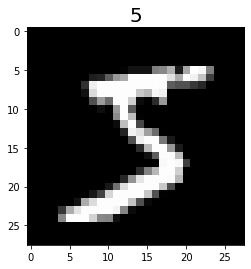

In [113]:
plt.title(label_mnist, fontsize=20)
plt.imshow(image_mnist[0].reshape(28,28), cmap="gray")

In [114]:
classes_mnist = [label for label in range(0, 10)]
classes_mnist

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [115]:
28*28*1

784

In [134]:
class Net_MNIST(nn.Module):

    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_1 = nn.Linear(input_dim * input_dim, 2 * hidden_dim)
        self.dropout = nn.Dropout(p=0.2)
        self.linear_2 = nn.Linear(2 * hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.flatten(x)
        x = F.relu(x)  
        x = self.linear_1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.linear_2(x)
        return x
    
    def predict(self, x):
        x = x.view(x.shape[0], -1)
        x = self.flatten(x)
        x = F.relu(x) 
        x = self.linear_1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.linear_2(x)
        x = F.softmax(x)
        return x

# print(torch.seed())
torch.manual_seed(6193999482419374643)
net_mnist = Net_MNIST(28, 32, 10)
net_mnist.train()

Net_MNIST(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_1): Linear(in_features=784, out_features=64, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (linear_2): Linear(in_features=64, out_features=10, bias=True)
)

In [135]:
torch.initial_seed()

6193999482419374643

In [136]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net_mnist.parameters(), lr=0.001)

In [137]:
num_epochs = 5

for epoch in range(num_epochs):
    running_loss = 0.0
    running_items = 0.0


    for i, data in enumerate(train_loader_mnist):
        inputs, labels = data[0], data[1]

        # Обнуляем градиент
        optimizer.zero_grad()
        # Делаем предсказание
        outputs = net_mnist(inputs)
        # Рассчитываем лосс-функцию
        loss = criterion(outputs, labels)
        # Делаем шаг назад по лоссу
        loss.backward()
        # Делаем шаг нашего оптимайзера
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        running_items += len(labels)
        if i % 500 == 0:    # печатаем каждые 300 mini-batches
            print(f'Epoch [{epoch + 1}/{num_epochs}]. ' \
                  f'Step [{i + 1}/{len(train_loader_mnist)}]. ' \
                  f'Loss: {running_loss / running_items:.3f}')
            running_loss, running_items = 0.0, 0.0

print('Training is finished!')

Epoch [1/5]. Step [1/1875]. Loss: 0.073
Epoch [1/5]. Step [501/1875]. Loss: 0.020
Epoch [1/5]. Step [1001/1875]. Loss: 0.011
Epoch [1/5]. Step [1501/1875]. Loss: 0.009
Epoch [2/5]. Step [1/1875]. Loss: 0.017
Epoch [2/5]. Step [501/1875]. Loss: 0.007
Epoch [2/5]. Step [1001/1875]. Loss: 0.007
Epoch [2/5]. Step [1501/1875]. Loss: 0.006
Epoch [3/5]. Step [1/1875]. Loss: 0.007
Epoch [3/5]. Step [501/1875]. Loss: 0.006
Epoch [3/5]. Step [1001/1875]. Loss: 0.005
Epoch [3/5]. Step [1501/1875]. Loss: 0.005
Epoch [4/5]. Step [1/1875]. Loss: 0.007
Epoch [4/5]. Step [501/1875]. Loss: 0.005
Epoch [4/5]. Step [1001/1875]. Loss: 0.004
Epoch [4/5]. Step [1501/1875]. Loss: 0.005
Epoch [5/5]. Step [1/1875]. Loss: 0.004
Epoch [5/5]. Step [501/1875]. Loss: 0.004
Epoch [5/5]. Step [1001/1875]. Loss: 0.004
Epoch [5/5]. Step [1501/1875]. Loss: 0.004
Training is finished!


In [138]:
data_iter_mnist = iter(test_loader_mnist)
images_mnist, labels_mnist = data_iter_mnist.next()

GroundTruth:  7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1


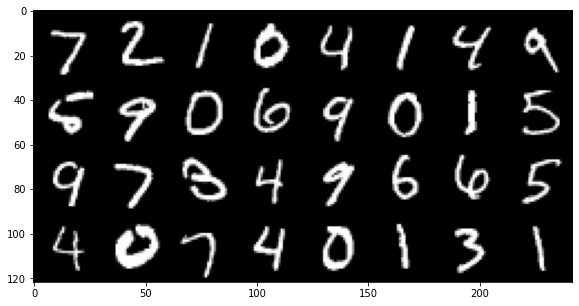

In [139]:
net_mnist.eval()
outputs_mnist = net_mnist(images_mnist)
imgs_mnist = torchvision.utils.make_grid(images_mnist)
plt.figure(figsize=(10, 5))
plt.imshow(imgs_mnist.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join(str(classes_mnist[labels_mnist[j]]) for j in range(len(labels_mnist))))

In [140]:
check_pred = net_mnist.predict(images_mnist)
check_pred[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


tensor([1.1621e-07, 2.9759e-09, 9.7178e-07, 2.4262e-04, 2.9017e-10, 1.9647e-06,
        4.7263e-14, 9.9974e-01, 1.9111e-06, 1.4611e-05],
       grad_fn=<SelectBackward0>)

In [141]:
_, predicted_mnist = torch.max(outputs_mnist, 1)

predicted_mnist

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1])

In [142]:
gt_mnist = np.array([classes_mnist[labels_mnist[j]] for j in range(len(labels_mnist))])
pred_mnist = np.array([classes_mnist[predicted_mnist[j]] for j in range(len(labels_mnist))])

print(gt_mnist)
print(pred_mnist)
print(f'Accuracy is {(gt_mnist == pred_mnist).sum() / len(gt_mnist)}')

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1]
Accuracy is 1.0
